# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

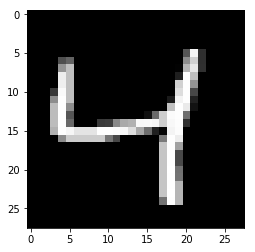

In [3]:
img = mnist.train.images[2]
print
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [6]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

# Input and target placeholders
image_size = mnist.train.images.shape[1]

inputs_ = tf.placeholder(tf.float32,(None,image_size),name="inputs")
targets_ = tf.placeholder(tf.float32,(None,image_size),name="targets")

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, image_size, activation=None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name='output')

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [7]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [8]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6936
Epoch: 1/20... Training loss: 0.6905
Epoch: 1/20... Training loss: 0.6874
Epoch: 1/20... Training loss: 0.6838
Epoch: 1/20... Training loss: 0.6792
Epoch: 1/20... Training loss: 0.6749
Epoch: 1/20... Training loss: 0.6683
Epoch: 1/20... Training loss: 0.6610
Epoch: 1/20... Training loss: 0.6518
Epoch: 1/20... Training loss: 0.6419
Epoch: 1/20... Training loss: 0.6314
Epoch: 1/20... Training loss: 0.6188
Epoch: 1/20... Training loss: 0.6051
Epoch: 1/20... Training loss: 0.5906
Epoch: 1/20... Training loss: 0.5755
Epoch: 1/20... Training loss: 0.5558
Epoch: 1/20... Training loss: 0.5408
Epoch: 1/20... Training loss: 0.5256
Epoch: 1/20... Training loss: 0.5019
Epoch: 1/20... Training loss: 0.4829
Epoch: 1/20... Training loss: 0.4706
Epoch: 1/20... Training loss: 0.4493
Epoch: 1/20... Training loss: 0.4360
Epoch: 1/20... Training loss: 0.4166
Epoch: 1/20... Training loss: 0.4042
Epoch: 1/20... Training loss: 0.3908
Epoch: 1/20... Training loss: 0.3774
E

Epoch: 1/20... Training loss: 0.1942
Epoch: 1/20... Training loss: 0.1891
Epoch: 1/20... Training loss: 0.1878
Epoch: 1/20... Training loss: 0.1939
Epoch: 1/20... Training loss: 0.1924
Epoch: 1/20... Training loss: 0.1954
Epoch: 1/20... Training loss: 0.1972
Epoch: 1/20... Training loss: 0.1928
Epoch: 1/20... Training loss: 0.1903
Epoch: 1/20... Training loss: 0.1903
Epoch: 1/20... Training loss: 0.1912
Epoch: 1/20... Training loss: 0.1944
Epoch: 1/20... Training loss: 0.1926
Epoch: 1/20... Training loss: 0.1907
Epoch: 1/20... Training loss: 0.1910
Epoch: 1/20... Training loss: 0.1938
Epoch: 1/20... Training loss: 0.1909
Epoch: 1/20... Training loss: 0.1892
Epoch: 1/20... Training loss: 0.1848
Epoch: 1/20... Training loss: 0.1935
Epoch: 1/20... Training loss: 0.1855
Epoch: 1/20... Training loss: 0.1907
Epoch: 1/20... Training loss: 0.1900
Epoch: 1/20... Training loss: 0.1937
Epoch: 1/20... Training loss: 0.1826
Epoch: 1/20... Training loss: 0.1839
Epoch: 1/20... Training loss: 0.1873
E

Epoch: 2/20... Training loss: 0.1595
Epoch: 2/20... Training loss: 0.1531
Epoch: 2/20... Training loss: 0.1546
Epoch: 2/20... Training loss: 0.1594
Epoch: 2/20... Training loss: 0.1553
Epoch: 2/20... Training loss: 0.1562
Epoch: 2/20... Training loss: 0.1593
Epoch: 2/20... Training loss: 0.1566
Epoch: 2/20... Training loss: 0.1548
Epoch: 2/20... Training loss: 0.1559
Epoch: 2/20... Training loss: 0.1516
Epoch: 2/20... Training loss: 0.1551
Epoch: 2/20... Training loss: 0.1527
Epoch: 2/20... Training loss: 0.1616
Epoch: 2/20... Training loss: 0.1555
Epoch: 2/20... Training loss: 0.1538
Epoch: 2/20... Training loss: 0.1535
Epoch: 2/20... Training loss: 0.1506
Epoch: 2/20... Training loss: 0.1545
Epoch: 2/20... Training loss: 0.1489
Epoch: 2/20... Training loss: 0.1528
Epoch: 2/20... Training loss: 0.1533
Epoch: 2/20... Training loss: 0.1517
Epoch: 2/20... Training loss: 0.1546
Epoch: 2/20... Training loss: 0.1544
Epoch: 2/20... Training loss: 0.1473
Epoch: 2/20... Training loss: 0.1551
E

Epoch: 3/20... Training loss: 0.1390
Epoch: 3/20... Training loss: 0.1421
Epoch: 3/20... Training loss: 0.1375
Epoch: 3/20... Training loss: 0.1412
Epoch: 3/20... Training loss: 0.1339
Epoch: 3/20... Training loss: 0.1382
Epoch: 3/20... Training loss: 0.1413
Epoch: 3/20... Training loss: 0.1348
Epoch: 3/20... Training loss: 0.1341
Epoch: 3/20... Training loss: 0.1368
Epoch: 3/20... Training loss: 0.1431
Epoch: 3/20... Training loss: 0.1394
Epoch: 3/20... Training loss: 0.1357
Epoch: 3/20... Training loss: 0.1369
Epoch: 3/20... Training loss: 0.1413
Epoch: 3/20... Training loss: 0.1398
Epoch: 3/20... Training loss: 0.1385
Epoch: 3/20... Training loss: 0.1371
Epoch: 3/20... Training loss: 0.1429
Epoch: 3/20... Training loss: 0.1410
Epoch: 3/20... Training loss: 0.1382
Epoch: 3/20... Training loss: 0.1404
Epoch: 3/20... Training loss: 0.1363
Epoch: 3/20... Training loss: 0.1356
Epoch: 3/20... Training loss: 0.1322
Epoch: 3/20... Training loss: 0.1387
Epoch: 3/20... Training loss: 0.1364
E

Epoch: 4/20... Training loss: 0.1282
Epoch: 4/20... Training loss: 0.1271
Epoch: 4/20... Training loss: 0.1272
Epoch: 4/20... Training loss: 0.1289
Epoch: 4/20... Training loss: 0.1233
Epoch: 4/20... Training loss: 0.1263
Epoch: 4/20... Training loss: 0.1287
Epoch: 4/20... Training loss: 0.1250
Epoch: 4/20... Training loss: 0.1291
Epoch: 4/20... Training loss: 0.1263
Epoch: 4/20... Training loss: 0.1276
Epoch: 4/20... Training loss: 0.1200
Epoch: 4/20... Training loss: 0.1257
Epoch: 4/20... Training loss: 0.1200
Epoch: 4/20... Training loss: 0.1215
Epoch: 4/20... Training loss: 0.1217
Epoch: 4/20... Training loss: 0.1248
Epoch: 4/20... Training loss: 0.1288
Epoch: 4/20... Training loss: 0.1216
Epoch: 4/20... Training loss: 0.1311
Epoch: 4/20... Training loss: 0.1248
Epoch: 4/20... Training loss: 0.1253
Epoch: 4/20... Training loss: 0.1243
Epoch: 4/20... Training loss: 0.1259
Epoch: 4/20... Training loss: 0.1251
Epoch: 4/20... Training loss: 0.1264
Epoch: 4/20... Training loss: 0.1205
E

Epoch: 4/20... Training loss: 0.1126
Epoch: 4/20... Training loss: 0.1141
Epoch: 4/20... Training loss: 0.1154
Epoch: 4/20... Training loss: 0.1161
Epoch: 4/20... Training loss: 0.1135
Epoch: 4/20... Training loss: 0.1133
Epoch: 4/20... Training loss: 0.1118
Epoch: 4/20... Training loss: 0.1149
Epoch: 4/20... Training loss: 0.1203
Epoch: 4/20... Training loss: 0.1135
Epoch: 4/20... Training loss: 0.1145
Epoch: 4/20... Training loss: 0.1177
Epoch: 4/20... Training loss: 0.1170
Epoch: 4/20... Training loss: 0.1144
Epoch: 4/20... Training loss: 0.1156
Epoch: 4/20... Training loss: 0.1095
Epoch: 4/20... Training loss: 0.1141
Epoch: 4/20... Training loss: 0.1148
Epoch: 4/20... Training loss: 0.1124
Epoch: 4/20... Training loss: 0.1185
Epoch: 4/20... Training loss: 0.1115
Epoch: 4/20... Training loss: 0.1144
Epoch: 4/20... Training loss: 0.1155
Epoch: 4/20... Training loss: 0.1133
Epoch: 4/20... Training loss: 0.1159
Epoch: 4/20... Training loss: 0.1164
Epoch: 4/20... Training loss: 0.1149
E

Epoch: 5/20... Training loss: 0.1114
Epoch: 5/20... Training loss: 0.1050
Epoch: 5/20... Training loss: 0.1084
Epoch: 5/20... Training loss: 0.1127
Epoch: 5/20... Training loss: 0.1057
Epoch: 5/20... Training loss: 0.1068
Epoch: 5/20... Training loss: 0.1094
Epoch: 5/20... Training loss: 0.1102
Epoch: 5/20... Training loss: 0.1074
Epoch: 5/20... Training loss: 0.1062
Epoch: 5/20... Training loss: 0.1046
Epoch: 5/20... Training loss: 0.1140
Epoch: 5/20... Training loss: 0.1098
Epoch: 5/20... Training loss: 0.1128
Epoch: 5/20... Training loss: 0.1138
Epoch: 5/20... Training loss: 0.1111
Epoch: 5/20... Training loss: 0.1051
Epoch: 5/20... Training loss: 0.1096
Epoch: 5/20... Training loss: 0.1104
Epoch: 5/20... Training loss: 0.1126
Epoch: 5/20... Training loss: 0.1085
Epoch: 5/20... Training loss: 0.1110
Epoch: 5/20... Training loss: 0.1093
Epoch: 5/20... Training loss: 0.1078
Epoch: 5/20... Training loss: 0.1146
Epoch: 5/20... Training loss: 0.1103
Epoch: 5/20... Training loss: 0.1121
E

Epoch: 6/20... Training loss: 0.1050
Epoch: 6/20... Training loss: 0.1044
Epoch: 6/20... Training loss: 0.1020
Epoch: 6/20... Training loss: 0.1063
Epoch: 6/20... Training loss: 0.1048
Epoch: 6/20... Training loss: 0.1045
Epoch: 6/20... Training loss: 0.1083
Epoch: 6/20... Training loss: 0.1053
Epoch: 6/20... Training loss: 0.1037
Epoch: 6/20... Training loss: 0.1026
Epoch: 6/20... Training loss: 0.1060
Epoch: 6/20... Training loss: 0.1035
Epoch: 6/20... Training loss: 0.1048
Epoch: 6/20... Training loss: 0.1081
Epoch: 6/20... Training loss: 0.1066
Epoch: 6/20... Training loss: 0.1093
Epoch: 6/20... Training loss: 0.1035
Epoch: 6/20... Training loss: 0.1042
Epoch: 6/20... Training loss: 0.1050
Epoch: 6/20... Training loss: 0.1031
Epoch: 6/20... Training loss: 0.1033
Epoch: 6/20... Training loss: 0.1057
Epoch: 6/20... Training loss: 0.1070
Epoch: 6/20... Training loss: 0.1066
Epoch: 6/20... Training loss: 0.1031
Epoch: 6/20... Training loss: 0.1036
Epoch: 6/20... Training loss: 0.1047
E

Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.1000
Epoch: 7/20... Training loss: 0.0989
Epoch: 7/20... Training loss: 0.1036
Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.1035
Epoch: 7/20... Training loss: 0.1029
Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.0954
Epoch: 7/20... Training loss: 0.0979
Epoch: 7/20... Training loss: 0.0991
Epoch: 7/20... Training loss: 0.1009
Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.0990
Epoch: 7/20... Training loss: 0.1043
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.1024
Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.1046
Epoch: 7/20... Training loss: 0.0990
Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.1030
E

Epoch: 7/20... Training loss: 0.0986
Epoch: 7/20... Training loss: 0.1027
Epoch: 7/20... Training loss: 0.1009
Epoch: 7/20... Training loss: 0.0995
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.0982
Epoch: 7/20... Training loss: 0.0984
Epoch: 7/20... Training loss: 0.1029
Epoch: 7/20... Training loss: 0.0989
Epoch: 7/20... Training loss: 0.0984
Epoch: 7/20... Training loss: 0.0985
Epoch: 7/20... Training loss: 0.0963
Epoch: 7/20... Training loss: 0.1020
Epoch: 7/20... Training loss: 0.0989
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.0997
Epoch: 7/20... Training loss: 0.1002
Epoch: 7/20... Training loss: 0.0988
Epoch: 7/20... Training loss: 0.0970
Epoch: 7/20... Training loss: 0.0989
Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.0990
Epoch: 7/20... Training loss: 0.0962
Epoch: 7/20... Training loss: 0.1024
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.0988
E

Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.0943
Epoch: 8/20... Training loss: 0.0996
Epoch: 8/20... Training loss: 0.0962
Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.1001
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.1014
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.0998
Epoch: 8/20... Training loss: 0.0962
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.0960
Epoch: 8/20... Training loss: 0.0948
Epoch: 8/20... Training loss: 0.0946
Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.0948
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.0956
Epoch: 8/20... Training loss: 0.0989
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.1034
Epoch: 8/20... Training loss: 0.0944
E

Epoch: 9/20... Training loss: 0.0985
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0954
Epoch: 9/20... Training loss: 0.0941
Epoch: 9/20... Training loss: 0.0983
Epoch: 9/20... Training loss: 0.0994
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0941
Epoch: 9/20... Training loss: 0.0950
Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0983
Epoch: 9/20... Training loss: 0.0985
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0982
Epoch: 9/20... Training loss: 0.0956
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0922
Epoch: 9/20... Training loss: 0.0983
Epoch: 9/20... Training loss: 0.0983
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.0946
Epoch: 9/20... Training loss: 0.0956
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0980
E

Epoch: 10/20... Training loss: 0.0991
Epoch: 10/20... Training loss: 0.0980
Epoch: 10/20... Training loss: 0.0927
Epoch: 10/20... Training loss: 0.0984
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0934
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0924
Epoch: 10/20... Training loss: 0.0908
Epoch: 10/20... Training loss: 0.0933
Epoch: 10/20... Training loss: 0.0924
Epoch: 10/20... Training loss: 0.0982
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0964
Epoch: 10/20... Training loss: 0.0934
Epoch: 10/20... Training loss: 0.0939
Epoch: 10/20... Training loss: 0.0936
Epoch: 10/20... Training loss: 0.0902
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0928
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0912
Epoch: 10/20... Training loss: 0.0979
Epoch: 10/20... Training loss: 0.0910
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0990
Epoch: 11/20... Training loss: 0.0929
Epoch: 11/20... Training loss: 0.0968
Epoch: 11/20... Training loss: 0.0970
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0932
Epoch: 11/20... Training loss: 0.0915
Epoch: 11/20... Training loss: 0.0977
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0998
Epoch: 11/20... Training loss: 0.0928
Epoch: 11/20... Training loss: 0.0921
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20... Training loss: 0.0970
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0921
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20... Training loss: 0.0925
Epoch: 11/20... Training loss: 0.0968
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0976
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20

Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0928
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0980
Epoch: 11/20... Training loss: 0.0924
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0918
Epoch: 11/20... Training loss: 0.0932
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0970
Epoch: 11/20... Training loss: 0.0990
Epoch: 11/20... Training loss: 0.0967
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0905
Epoch: 11/20... Training loss: 0.0973
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0922
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0899
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0967
Epoch: 12/20... Training loss: 0.0960
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0959
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0959
Epoch: 12/20... Training loss: 0.0957
Epoch: 12/20... Training loss: 0.0926
Epoch: 12/20... Training loss: 0.0912
Epoch: 12/20... Training loss: 0.0923
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0927
Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0962
Epoch: 12/20... Training loss: 0.0963
Epoch: 12/20... Training loss: 0.0917
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0955
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0963
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0960
Epoch: 13/20... Training loss: 0.0917
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0968
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0942
Epoch: 13/20... Training loss: 0.0902
Epoch: 13/20... Training loss: 0.0967
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0951
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0949
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0957
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0916
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0958
Epoch: 13/20... Training loss: 0.0989
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0960
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0964
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0961
Epoch: 14/20... Training loss: 0.0963
Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20... Training loss: 0.0955
Epoch: 14/20... Training loss: 0.0907
Epoch: 14/20... Training loss: 0.0962
Epoch: 14/20

Epoch: 14/20... Training loss: 0.0963
Epoch: 14/20... Training loss: 0.0969
Epoch: 14/20... Training loss: 0.0988
Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0950
Epoch: 14/20... Training loss: 0.0962
Epoch: 14/20... Training loss: 0.0967
Epoch: 14/20... Training loss: 0.0962
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20... Training loss: 0.0969
Epoch: 14/20... Training loss: 0.0920
Epoch: 14/20... Training loss: 0.0917
Epoch: 14/20... Training loss: 0.0963
Epoch: 14/20... Training loss: 0.0967
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0911
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0891
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0962
Epoch: 14/20... Training loss: 0.0965
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0967
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0915
Epoch: 15/20... Training loss: 0.0961
Epoch: 15/20... Training loss: 0.0964
Epoch: 15/20... Training loss: 0.0907
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0912
Epoch: 15/20... Training loss: 0.0913
Epoch: 15/20... Training loss: 0.0952
Epoch: 15/20... Training loss: 0.0954
Epoch: 15/20... Training loss: 0.0956
Epoch: 15/20... Training loss: 0.0898
Epoch: 15/20... Training loss: 0.0960
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0951
Epoch: 15/20... Training loss: 0.0918
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0909
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0918
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0926
Epoch: 16/20... Training loss: 0.0960
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0926
Epoch: 16/20... Training loss: 0.0956
Epoch: 16/20... Training loss: 0.0899
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0920
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0892
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0919
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0957
Epoch: 16/20... Training loss: 0.0918
Epoch: 16/20... Training loss: 0.0962
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0915
Epoch: 16/20... Training loss: 0.0919
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0971
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0972
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0904
Epoch: 17/20... Training loss: 0.0904
Epoch: 17/20... Training loss: 0.0967
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0923
Epoch: 17/20... Training loss: 0.0907
Epoch: 17/20... Training loss: 0.0918
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0918
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0962
Epoch: 17/20... Training loss: 0.0956
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0975
Epoch: 17/20... Training loss: 0.0921
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0958
Epoch: 17/20... Training loss: 0.0966
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0915
Epoch: 17/20

Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0919
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0923
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0910
Epoch: 17/20... Training loss: 0.0955
Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20... Training loss: 0.0967
Epoch: 17/20... Training loss: 0.0908
Epoch: 17/20... Training loss: 0.0910
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0892
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0910
Epoch: 17/20... Training loss: 0.0966
Epoch: 18/20... Training loss: 0.0973
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0963
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0914
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0909
Epoch: 18/20... Training loss: 0.0891
Epoch: 18/20

Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0906
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0920
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0913
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0908
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0914
Epoch: 18/20... Training loss: 0.0986
Epoch: 18/20... Training loss: 0.0897
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0908
Epoch: 18/20... Training loss: 0.0965
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0916
Epoch: 18/20... Training loss: 0.0958
Epoch: 18/20... Training loss: 0.0957
Epoch: 18/20... Training loss: 0.0910
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0892
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0917
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0969
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0957
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0944
Epoch: 19/20... Training loss: 0.0955
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0944
Epoch: 19/20... Training loss: 0.0996
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0911
Epoch: 19/20... Training loss: 0.0916
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0890
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0918
Epoch: 19/20... Training loss: 0.0894
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0917
Epoch: 19/20... Training loss: 0.0894
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0916
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0899
Epoch: 20/20... Training loss: 0.0918
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0958
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0958
Epoch: 20/20... Training loss: 0.0890
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0952
Epoch: 20/20... Training loss: 0.0984
Epoch: 20/20... Training loss: 0.0970
Epoch: 20/20... Training loss: 0.0955
Epoch: 20/20... Training loss: 0.0927
Epoch: 20/20... Training loss: 0.0912
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0888
Epoch: 20/20... Training loss: 0.0918
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

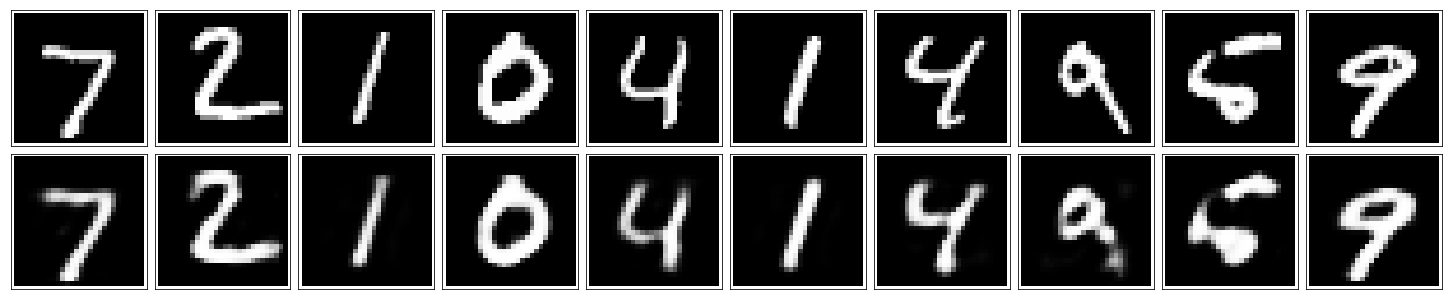

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [10]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.